In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# hello world
data = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
def calculate_woe(df, feature, y):
    ''' calculates WoE and IV for each feature '''
    df = pd.concat([df[feature], y], axis=1)
    target = df.columns.values[1]
    
    # calculate number of occurences of the given bin (support)
    support = df.groupby(feature, as_index=False)[target].count()
    # calculate the proportion of positive occurences 
    n_pos = df.groupby(feature, as_index = False)[target].mean()
    # get dataframe of (binned_feature, support, n_pos)
    df = pd.concat([support, n_pos], axis=1).iloc[:, [0, 1, 3]]
    df.columns = [feature, 'support', 'pos%']
    # count of positive/negative occurences
    positive = df['pos%'] * df['support']
    negative = (1 - df['pos%']) * df['support']
    # calculate what percentage of total positives/negatives given feature bin has
    pos = positive / positive.sum(); neg = negative / negative.sum()
    # finally calculate WoE and sort dataframe by WoE for plotting
    df['WoE'] = np.log(pos / neg)
    df = df.sort_values(['WoE']).reset_index(drop=True)
    # calculate IV using WoE
    df['IV'] = abs(((pos - neg) * df['WoE']).sum())
    return df

def plot_woe(df):
    ''' plots support, WoE and IV of each feature '''
    plt.figure(figsize=(10, 5))
    plt.plot(df.iloc[:, 0].astype(str), df['WoE'], marker = 'o', color='black')
    plt.xlabel(df.columns[0])
    plt.ylabel('WoE')

In [111]:
# preprocess the target column
''' 
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
'''

# following features will be labeled `0` to indicate "bad" loans
data['loan_status'] = data['loan_status'].replace(['Charged Off', 'Late (31-120 days)', 'Default',
                                                  'Does not meet the credit policy. Status:Charged Off'], 0)
# following features will be labeled `1` to indicate "good" loans
data['loan_status'] = data['loan_status'].replace(['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)',
                                                  'Does not meet the credit policy. Status:Fully Paid'], 1)


## Data Preprocessing

In [112]:
X_woe = pd.DataFrame()

### loan_amnt

,loan_amnt,support,pos%,WoE,IV
0,"(20000.0, 35000.0]",97758,0.884337,-0.063688,0.001856
1,"(12000.0, 20000.0]",134488,0.889090,-0.016360,0.001856
2,"(8000.0, 12000.0]",108713,0.892166,0.015211,0.001856
3,"(499.999, 8000.0]",125326,0.896095,0.056725,0.001856


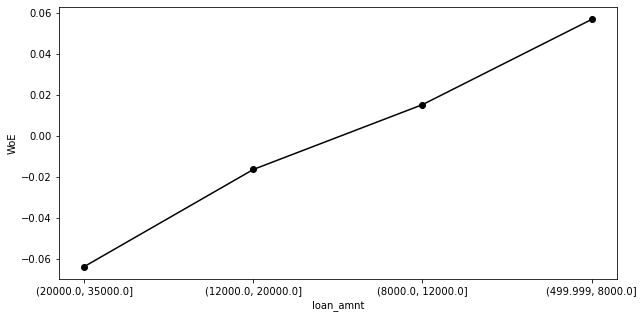

In [113]:
X_woe['loan_amnt'] = pd.qcut(data['loan_amnt'], 4)
df_temp = calculate_woe(X_woe, 'loan_amnt', data['loan_status'])
plot_woe(df_temp)
df_temp

### funded_amnt

,funded_amnt,support,pos%,WoE,IV
0,"(20000.0, 35000.0]",97239,0.884882,-0.058352,0.001663
1,"(12000.0, 20000.0]",134579,0.888957,-0.017709,0.001663
2,"(8000.0, 12000.0]",108880,0.891927,0.012732,0.001663
3,"(499.999, 8000.0]",125587,0.895984,0.055539,0.001663


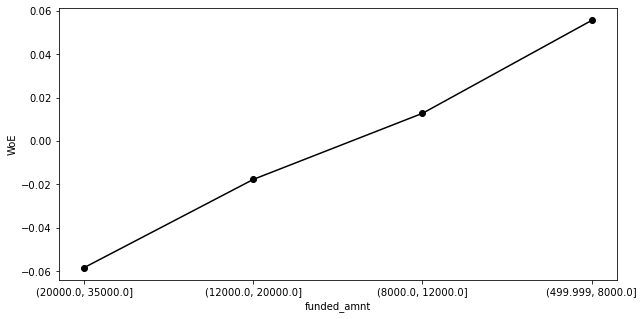

In [114]:
X_woe['funded_amnt'] = pd.qcut(data['funded_amnt'], 4)
df_temp = calculate_woe(X_woe, 'funded_amnt', data['loan_status'])
plot_woe(df_temp)
df_temp

### funded_amnt_inv

,funded_amnt_inv,support,pos%,WoE,IV
0,"(23333.333, 35000.0]",74892,0.887785,-0.029530,0.000162
1,"(11666.667, 23333.333]",183004,0.890877,0.001884,0.000162
2,"(-35.0, 11666.667]",208389,0.891578,0.009115,0.000162


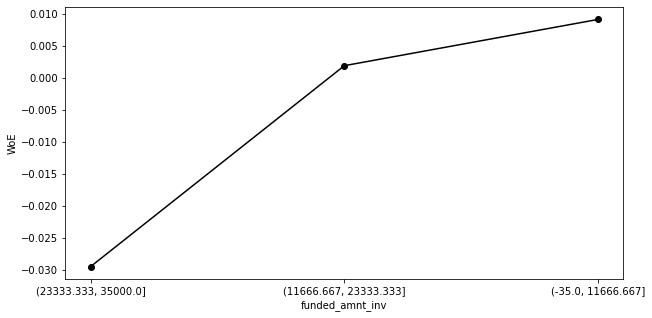

In [115]:
X_woe['funded_amnt_inv'] = pd.cut(data['funded_amnt_inv'], 3)
df_temp = calculate_woe(X_woe, 'funded_amnt_inv', data['loan_status'])
plot_woe(df_temp)
df_temp

### term

,term,support,pos%,WoE,IV
0,60 months,128332,0.858508,-0.294894,0.03886
1,36 months,337953,0.902915,0.132203,0.03886


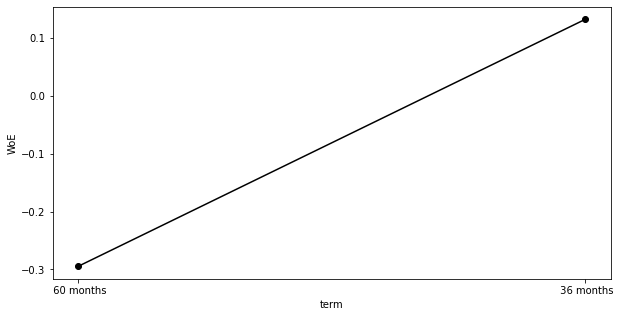

In [116]:
df_temp = calculate_woe(data, 'term', data['loan_status'])
plot_woe(df_temp)
df_temp

### int_rate

,int_rate,support,pos%,WoE,IV
0,"(19.18, 26.06]",54591,0.792603,-0.757155,0.221917
1,"(12.3, 19.18]",239482,0.875431,-0.147986,0.221917
2,"(5.399, 12.3]",172212,0.943012,0.708396,0.221917


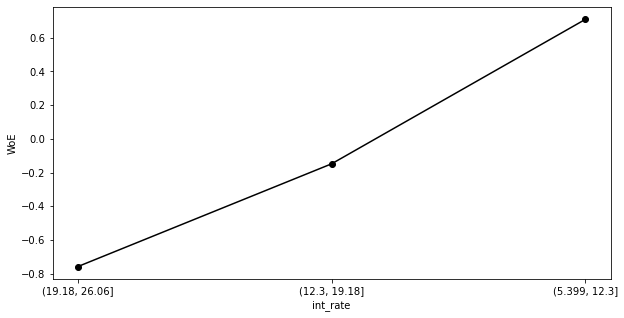

In [117]:
X_woe['int_rate'] = pd.cut(data['int_rate'], 3)
df_temp = calculate_woe(X_woe, 'int_rate', data['loan_status'])
plot_woe(df_temp)
df_temp

### installment

,installment,support,pos%,WoE,IV
0,"(495.35, 1409.99]",155425,0.885057,-0.056627,0.002326
1,"(300.39, 495.35]",155363,0.890463,-0.002365,0.002326
2,"(15.669, 300.39]",155497,0.896557,0.061702,0.002326


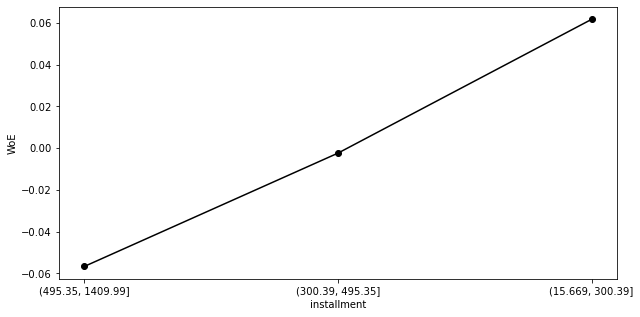

In [118]:
X_woe['installment'] = pd.qcut(data['installment'], 3)
df_temp = calculate_woe(X_woe, 'installment', data['loan_status'])
plot_woe(df_temp)
df_temp

### grade

,grade,support,pos%,WoE,IV
0,G,3322,0.721854,-1.144166,0.205307
1,F,13229,0.758712,-0.952214,0.205307
2,E,35757,0.805241,-0.678466,0.205307
3,D,76888,0.845906,-0.395001,0.205307
4,C,125293,0.885197,-0.055251,0.205307
5,B,136929,0.921426,0.364043,0.205307
6,A,74867,0.961305,1.114730,0.205307


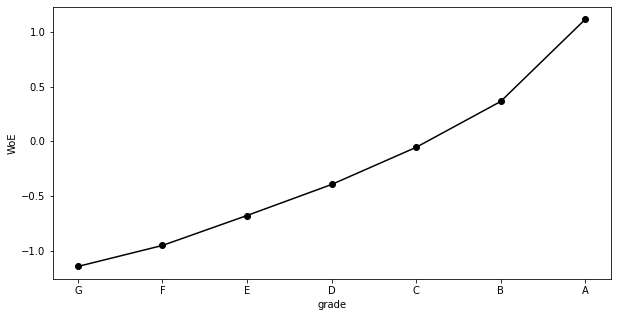

In [119]:
df_temp = calculate_woe(data, 'grade', data['loan_status'])
plot_woe(df_temp)
df_temp

### sub_grade

,sub_grade,support,pos%,WoE,IV
0,G1,1109,0.706943,-1.217260,0.211104
1,F5,1513,0.708526,-1.209608,0.211104
2,G5,385,0.711688,-1.194246,0.211104
3,G3,583,0.715266,-1.176746,0.211104
4,G2,823,0.736330,-1.070861,0.211104
5,F4,2067,0.745041,-1.025507,0.211104
6,F3,2708,0.750739,-0.995289,0.211104
7,G4,422,0.751185,-0.992903,0.211104
8,F2,3001,0.768411,-0.898486,0.211104
9,E5,5087,0.780224,-0.830871,0.211104


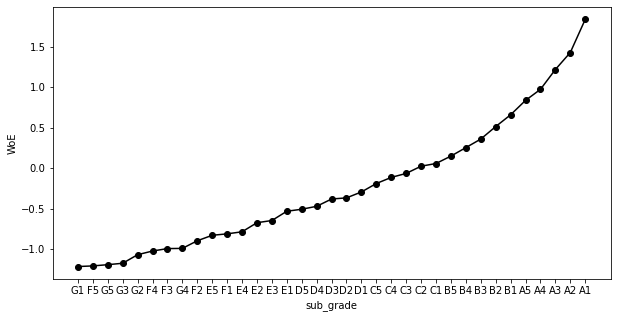

In [120]:
df_temp = calculate_woe(data, 'sub_grade', data['loan_status'])
plot_woe(df_temp)
df_temp

,sub_grade,support,pos%,WoE,IV
0,"(-0.001, 14.0]",52308,0.788178,-0.783868,0.304499
1,"(14.0, 18.0]",57627,0.841706,-0.426866,0.304499
2,"(18.0, 20.0]",41439,0.865006,-0.240335,0.304499
3,"(20.0, 22.0]",49422,0.881591,-0.090259,0.304499
4,"(22.0, 24.0]",53693,0.894511,0.039831,0.304499
5,"(24.0, 26.0]",55757,0.909070,0.204485,0.304499
6,"(26.0, 27.0]",31686,0.921038,0.358686,0.304499
7,"(27.0, 29.0]",49486,0.935598,0.578196,0.304499
8,"(29.0, 31.0]",40802,0.952404,0.898403,0.304499
9,"(31.0, 34.0]",34065,0.971965,1.448035,0.304499


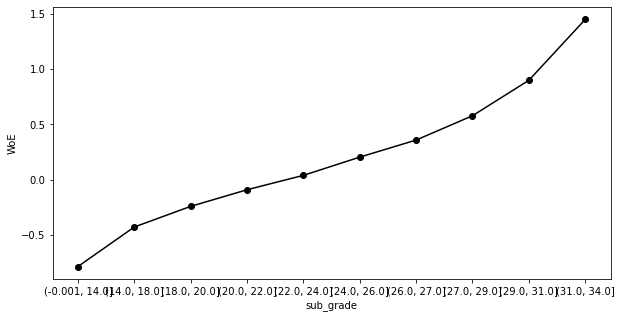

In [121]:
# since grades are ordinal data (we can compare them), its best to use a label encoder here. Otherwise we have too many features
grades = list(data['sub_grade'].unique())
grades.sort(reverse=True) # sorts grades as [G5, G4, ... A2, A1]
grades_map = dict(zip(grades, list(range(len(grades))))) # get dict of corresponding indices
data['sub_grade'] = data['sub_grade'].apply(lambda x: grades_map[x])
# plot the results
X_woe['sub_grade'] = pd.qcut(data['sub_grade'], 10)
df_temp = calculate_woe(X_woe, 'sub_grade', data['loan_status'])
plot_woe(df_temp)
df_temp

We have effectively reduced number of features from 35 to 10 while also increasing the IV

### emp_length

In [122]:
print(data['emp_length'].value_counts())
print(data['emp_length'].isnull().sum())

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
21008


In [123]:
# lots of nan, best strategy would be to make it a separate category
data['emp_length'] = data['emp_length'].fillna('NaN')

,emp_length,support,pos%,WoE,IV
0,NaN,21008,0.867384,-0.219821,0.003532
1,< 1 year,36265,0.881015,-0.095769,0.003532
2,6 years,26112,0.882889,-0.077766,0.003532
3,5 years,30774,0.885033,-0.056866,0.003532
4,9 years,17888,0.887914,-0.028239,0.003532
5,1 year,29622,0.888124,-0.026127,0.003532
6,7 years,26180,0.888655,-0.020764,0.003532
7,8 years,22395,0.889931,-0.007810,0.003532
8,2 years,41373,0.890242,-0.004624,0.003532
9,4 years,28023,0.890411,-0.002893,0.003532


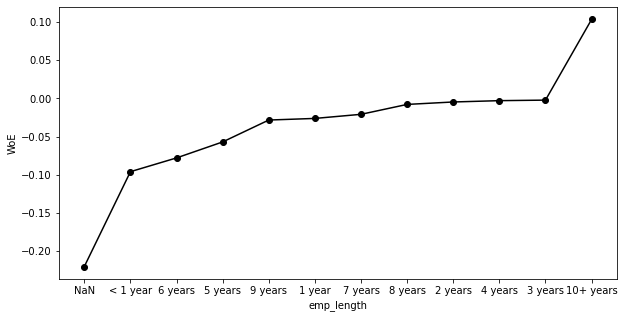

In [124]:
df_temp = calculate_woe(data, 'emp_length', data['loan_status'])
plot_woe(df_temp)
df_temp

In [125]:
# again, we have an ordinal feature, best to label encode it
emp_len = ['NaN', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
           '6 years', '7 years', '8 years', '9 years', '10+ years']
emp_len_map = dict(zip(emp_len, range(len(emp_len))))
data['emp_length'] = data['emp_length'].apply(lambda x: emp_len_map[x])

,emp_length,support,pos%,WoE,IV
0,"(-0.011, 2.75]",86895,0.880143,-0.104062,0.004514
1,"(5.5, 8.25]",83066,0.885501,-0.052260,0.004514
2,"(2.75, 5.5]",105992,0.890369,-0.003327,0.004514
3,"(8.25, 11.0]",190332,0.897957,0.076887,0.004514


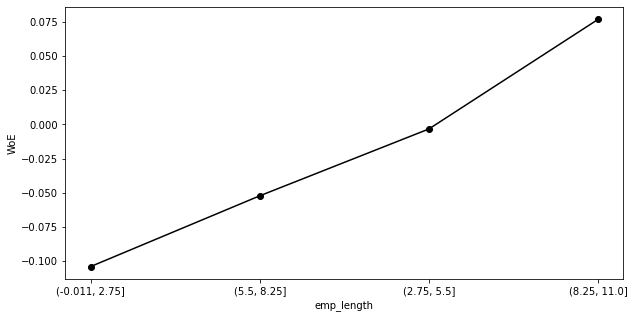

In [126]:
# plot the results
X_woe['emp_length'] = pd.cut(data['emp_length'], 4)
df_temp = calculate_woe(X_woe, 'emp_length', data['loan_status'])
plot_woe(df_temp)
df_temp

### home_ownership

In [127]:
print(data['home_ownership'].value_counts())
print(data['home_ownership'].isnull().sum())

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
0


,home_ownership,support,pos%,WoE,IV
0,RENT,188473,0.873897,-0.161980,0.021149
1,OWN,41704,0.891737,0.010764,0.021149
2,MORTGAGE,236108,0.903917,0.143679,0.021149


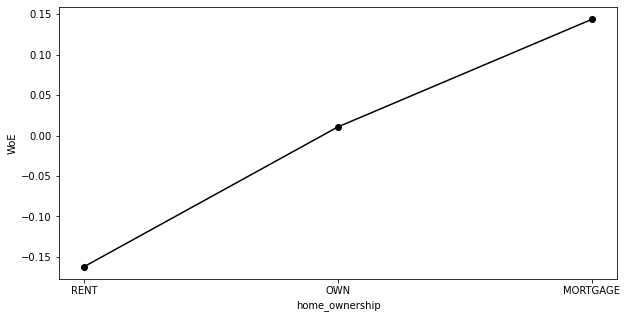

In [128]:
# features ANY/NONE/OTHER contain too few samples, therefore we aggregate them with mode - MORTGAGE
data['home_ownership'] = data['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'MORTGAGE')
df_temp = calculate_woe(data, 'home_ownership', data['loan_status'])
plot_woe(df_temp)
df_temp

### annual_inc

In [129]:
print(data['annual_inc'].describe())
print(data['annual_inc'].isnull().sum())

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64
4


,annual_inc,support,pos%,WoE,IV
0,"(1895.999, 50000.0]",157715,0.865390,-0.237035,0.047585
1,"(50000.0, 78000.0]",153609,0.890404,-0.002965,0.047585
2,"(78000.0, 7500000.0]",154957,0.916732,0.300913,0.047585


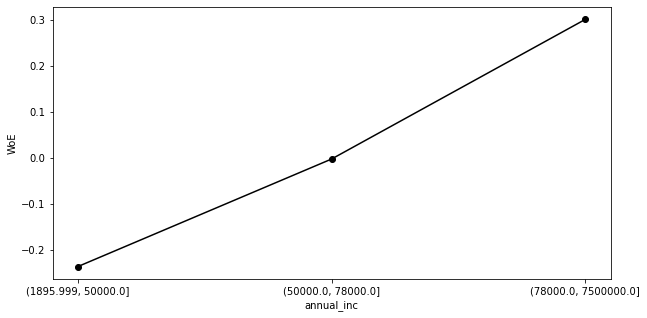

In [130]:
X_woe['annual_inc'] = pd.qcut(data['annual_inc'], 3)
df_temp = calculate_woe(X_woe, 'annual_inc', data['loan_status'])
plot_woe(df_temp)
df_temp

### verification_status

,verification_status,support,pos%,WoE,IV
0,Verified,168055,0.872631,-0.173420,0.018854
1,Source Verified,149993,0.895882,0.054438,0.018854
2,Not Verified,148237,0.905921,0.166972,0.018854


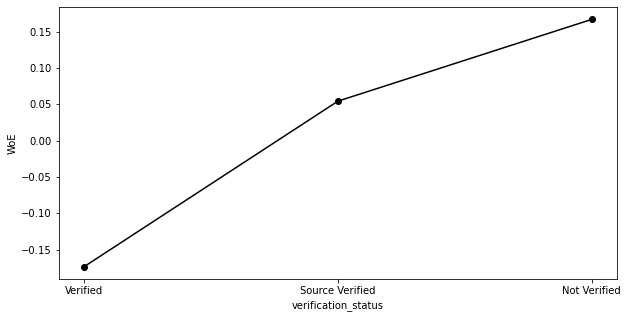

In [131]:
df_temp = calculate_woe(data, 'verification_status', data['loan_status'])
plot_woe(df_temp)
df_temp

### issue_d

In [132]:
# based on domain knowledge, its best to omit this feature, banks to not give any preference to any specific issue dates
print(data['issue_d'].describe())
print(data['issue_d'].isnull().sum())

count     466285
unique        91
top       Oct-14
freq       38782
Name: issue_d, dtype: object
0


### pymnt_plan

In [133]:
# omit this feature, features with value `y` are encountered very rarely
print(data['pymnt_plan'].value_counts())
print(data['pymnt_plan'].isnull().sum())

n    466276
y         9
Name: pymnt_plan, dtype: int64
0


### purpose

,purpose,support,pos%,WoE,IV
0,small_business,7013,0.784258,-0.807190,0.036295
1,educational,422,0.791469,-0.764040,0.036295
2,renewable_energy,351,0.846154,-0.393096,0.036295
3,moving,2994,0.847361,-0.383790,0.036295
4,house,2269,0.859850,-0.283798,0.036295
5,other,23690,0.862009,-0.265764,0.036295
6,medical,4602,0.866145,-0.230548,0.036295
7,wedding,2343,0.878361,-0.120843,0.036295
8,vacation,2487,0.882187,-0.084535,0.036295
9,debt_consolidation,274195,0.886690,-0.040475,0.036295


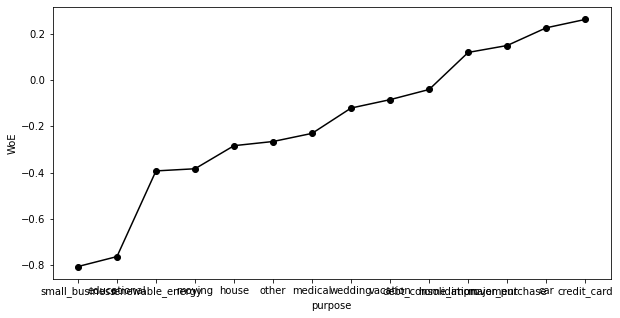

In [134]:
df_temp = calculate_woe(data, 'purpose', data['loan_status'])
plot_woe(df_temp)
df_temp

-----------------------------------------------------------------------

In [135]:
#function to print all the columns
def printcolumns():
    for col in data:
        print(col)
printcolumns()

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m


In [136]:
""" 
dti:debt to income ratio
delinq_2years: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
earlist_cr_line:The date the borrower's earliest reported credit line was opened.
inq_last_6mths:The number of inquiries in past 6 months (excluding auto and mortgage inquiries
mths since last delinq:The number of months since the borrower's last delinquency.
mths_since_last_record: The number of months since the last public record.
open_acc: The number of open credit lines in the borrower's credit file.
pub rec: Number of derogatory public records
revol_bal: Total credit revolving balance
"""

" \ndti:debt to income ratio\ndelinq_2years: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.\nearlist_cr_line:The date the borrower's earliest reported credit line was opened.\ninq_last_6mths:The number of inquiries in past 6 months (excluding auto and mortgage inquiries\nmths since last delinq:The number of months since the borrower's last delinquency.\nmths_since_last_record: The number of months since the last public record.\nopen_acc: The number of open credit lines in the borrower's credit file.\npub rec: Number of derogatory public records\nrevol_bal: Total credit revolving balance\n"

In [137]:
#title, zip_code,addr_state features are not important. So, i am not considering those features

# dti

In [138]:
print(data['dti'].value_counts())
print(data['dti'].isnull().sum())

14.40    410
19.20    381
12.00    369
16.80    368
18.00    365
        ... 
37.51      2
39.94      1
38.95      1
35.54      1
39.14      1
Name: dti, Length: 3997, dtype: int64
0


,dti,support,pos%,WoE,IV
0,"(22.78, 39.99]",116522,0.870016,-0.196744,0.0247
1,"(16.87, 22.78]",116511,0.883041,-0.076295,0.0247
2,"(11.36, 16.87]",116620,0.899906,0.098333,0.0247
3,"(-0.001, 11.36]",116632,0.909785,0.213164,0.0247


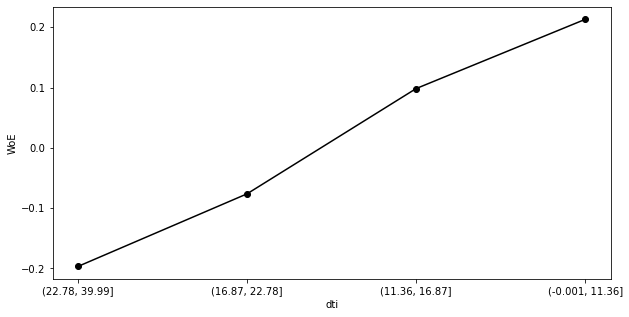

In [139]:
X_woe['dti'] = pd.qcut(data['dti'], 4)
df_temp = calculate_woe(X_woe, 'dti', data['loan_status'])
plot_woe(df_temp)
df_temp

# delinq_2yrs

In [140]:
print(data['delinq_2yrs'].value_counts())
print(data['delinq_2yrs'].isnull().sum())

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64
29


In [141]:
data['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [142]:
#as there are only 29 null values we can replace them with the median of the data
data['delinq_2yrs'] = data['delinq_2yrs'].replace([None,np.nan], 0.0)

In [143]:
print(data['delinq_2yrs'].isnull().sum())

0


,delinq_2yrs,support,pos%,WoE,IV
0,"(19.333, 29.0]",6,0.833333,-0.488406,0.000022
1,"(9.667, 19.333]",201,0.845771,-0.396033,0.000022
2,"(-0.029, 9.667]",466078,0.890714,0.000207,0.000022


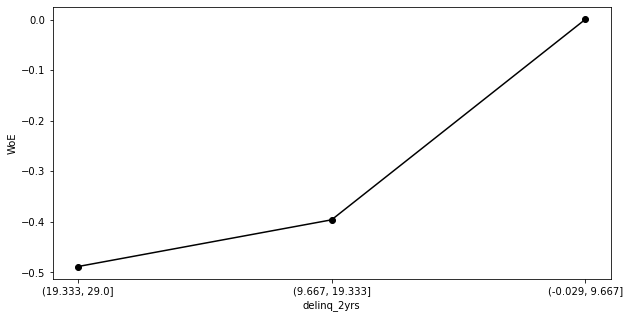

In [144]:
X_woe['delinq_2yrs'] = pd.cut(data['delinq_2yrs'], 3)
df_temp = calculate_woe(X_woe, 'delinq_2yrs', data['loan_status'])
plot_woe(df_temp)
df_temp

# earliest_cr_line

In [145]:
print(data['earliest_cr_line'].value_counts())
print(data['earliest_cr_line'].isnull().sum())

Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64
29


In [146]:
data['earliest_cr_line'].describe()

count     466256
unique       664
top       Oct-00
freq        3674
Name: earliest_cr_line, dtype: object

In [147]:
#as there are only 29 null values we can replace them with the median of the data
data['earliest_cr_line'] = data['earliest_cr_line'].replace([None,np.nan], "Oct-00")
print(data['earliest_cr_line'].isnull().sum())

0


In [148]:
# X_woe['earliest_cr_line'] = pd.cut(data['earliest_cr_line'], 4)
# df_temp = calculate_woe(X_woe, 'earliest_cr_line', data['loan_status'])
# plot_woe(df_temp)
# df_temp

# inq_last_6mths

In [149]:
print(data['inq_last_6mths'].value_counts())
print(data['inq_last_6mths'].isnull().sum())

0.0     241498
1.0     130148
2.0      57825
3.0      25126
4.0       7241
5.0       2768
6.0       1188
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
13.0         6
14.0         6
18.0         4
16.0         3
17.0         2
24.0         2
19.0         2
32.0         1
33.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: inq_last_6mths, dtype: int64
29


In [150]:
#as there are only 29 null values we can replace them with the median of the data
data['inq_last_6mths'] = data['inq_last_6mths'].replace([None,np.nan], 0.0)
print(data['inq_last_6mths'].isnull().sum())

0


,inq_last_6mths,support,pos%,WoE,IV
0,"(11.0, 22.0]",48,0.541667,-1.930790,0.000217
1,"(22.0, 33.0]",8,0.625000,-1.587018,0.000217
2,"(-0.033, 11.0]",466229,0.890734,0.000416,0.000217


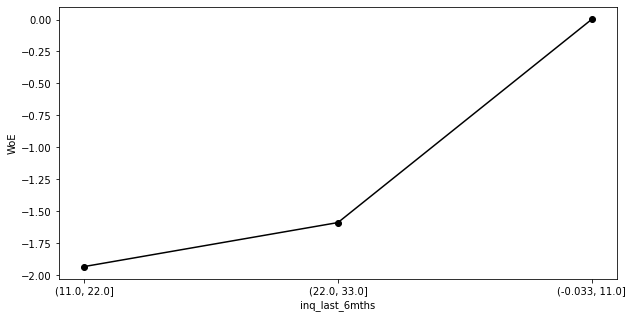

In [151]:
X_woe['inq_last_6mths'] = pd.cut(data['inq_last_6mths'], 3)
df_temp = calculate_woe(X_woe, 'inq_last_6mths', data['loan_status'])
plot_woe(df_temp)
df_temp

# mths_since_last_delinq

In [152]:
print(data['mths_since_last_delinq'].value_counts())
print(data['mths_since_last_delinq'].isnull().sum())

9.0      4358
8.0      4272
13.0     4260
12.0     4193
10.0     4146
         ... 
156.0       1
143.0       1
118.0       1
149.0       1
121.0       1
Name: mths_since_last_delinq, Length: 145, dtype: int64
250351


In [153]:
# there are lots of nan, best thing to do would be to make it a separate category
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna('NaN')

In [154]:
# df_temp = calculate_woe(data, 'mths_since_last_delinq', data['loan_status'])
# plot_woe(df_temp)
# df_temp

# mths_since_last_record

In [155]:
print(data['mths_since_last_record'].value_counts())
print(data['mths_since_last_record'].isnull().sum())

0.0      1278
109.0    1098
108.0     999
106.0     968
104.0     953
         ... 
1.0        28
2.0        24
120.0       2
121.0       2
129.0       1
Name: mths_since_last_record, Length: 123, dtype: int64
403647


In [156]:
# there are lots of nan, best thing to do would be to make it a separate category
data['mths_since_last_record'] = data['mths_since_last_record'].fillna('NaN')

In [157]:
# df_temp = calculate_woe(data, 'mths_since_last_record', data['loan_status'])
# plot_woe(df_temp)
# df_temp

# open_acc

In [158]:
print(data['open_acc'].value_counts())
print(data['open_acc'].isnull().sum())

9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
        ...  
55.0        2
62.0        1
84.0        1
75.0        1
61.0        1
Name: open_acc, Length: 62, dtype: int64
29


In [159]:
data['open_acc'].describe()

count    466256.000000
mean         11.187069
std           4.987526
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

In [160]:
#as there are only 29 null values we can replace them with the median of the data. also mode is almost same as mean here.
data['open_acc'] = data['open_acc'].replace([None,np.nan], 9.0)
print(data['open_acc'].isnull().sum())

0


,open_acc,support,pos%,WoE,IV
0,"(63.0, 84.0]",4,0.500000,-2.097844,0.004053
1,"(-0.084, 21.0]",448590,0.890497,-0.002017,0.004053
2,"(21.0, 42.0]",17588,0.895497,0.050318,0.004053
3,"(42.0, 63.0]",103,0.941748,0.685107,0.004053


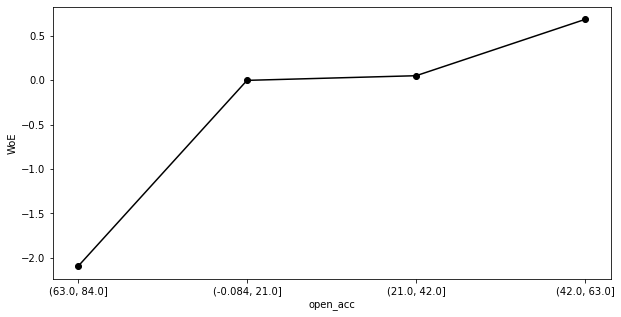

In [161]:
X_woe['open_acc'] = pd.cut(data['open_acc'], 4)
df_temp = calculate_woe(X_woe, 'open_acc', data['loan_status'])
plot_woe(df_temp)
df_temp

# pub_rec

In [162]:
print(data['pub_rec'].value_counts())
print(data['pub_rec'].isnull().sum())

0.0     404893
1.0      53051
2.0       5624
3.0       1611
4.0        520
5.0        276
6.0        136
7.0         62
8.0         29
9.0         16
10.0        13
11.0         8
12.0         2
18.0         2
13.0         2
40.0         1
34.0         1
21.0         1
63.0         1
54.0         1
14.0         1
15.0         1
16.0         1
19.0         1
49.0         1
17.0         1
Name: pub_rec, dtype: int64
29


In [163]:
data['pub_rec'].describe()

count    466256.000000
mean          0.160564
std           0.510863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [164]:
#as there are only 29 null values we can replace them with the median of the data
data['pub_rec'] = data['pub_rec'].replace([None,np.nan], 0.0)
print(data['pub_rec'].isnull().sum())

0


In [165]:
# X_woe['pub_rec'] = pd.cut(data['pub_rec'], 4)
# df_temp = calculate_woe(X_woe, 'pub_rec', data['loan_status'])
# plot_woe(df_temp)
# df_temp

### revol_bal

In [166]:
print(data['revol_bal'].value_counts())
print(data['revol_bal'].isnull().sum())

0         2269
6052        40
8696        39
5896        39
4532        39
          ... 
51021        1
38032        1
45601        1
40823        1
119663       1
Name: revol_bal, Length: 58142, dtype: int64
0


In [167]:
data['revol_bal'].describe()

count    4.662850e+05
mean     1.623020e+04
std      2.067625e+04
min      0.000000e+00
25%      6.413000e+03
50%      1.176400e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

,revol_bal,support,pos%,WoE,IV
0,"(1712663.333, 2568995.0]",4,0.750000,-0.999232,0.000016
1,"(856331.667, 1712663.333]",7,0.857143,-0.306085,0.000016
2,"(-2568.995, 856331.667]",466274,0.890695,0.000018,0.000016


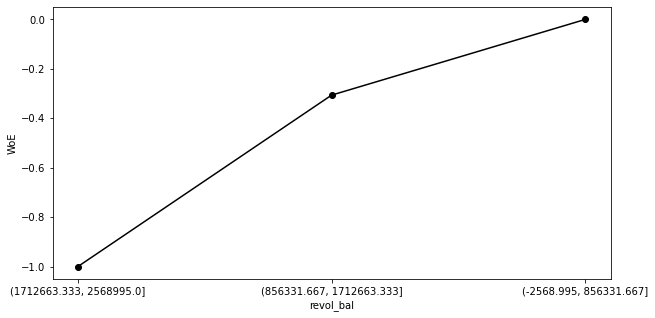

In [168]:
X_woe['revol_bal'] = pd.cut(data['revol_bal'], 3)
df_temp = calculate_woe(X_woe, 'revol_bal', data['loan_status'])
plot_woe(df_temp)
df_temp

### revol_util

In [169]:
print(data['revol_util'].value_counts())
print(data['revol_util'].isnull().sum())

0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: revol_util, Length: 1269, dtype: int64
340


,revol_util,support,pos%,WoE,IV
0,"(74.7, 892.3]",116339,0.869270,-0.203784,0.025713
1,"(57.6, 74.7]",116094,0.885136,-0.056309,0.025713
2,"(39.2, 57.6]",116915,0.896831,0.064196,0.025713
3,"(-0.001, 39.2]",116597,0.911627,0.235364,0.025713


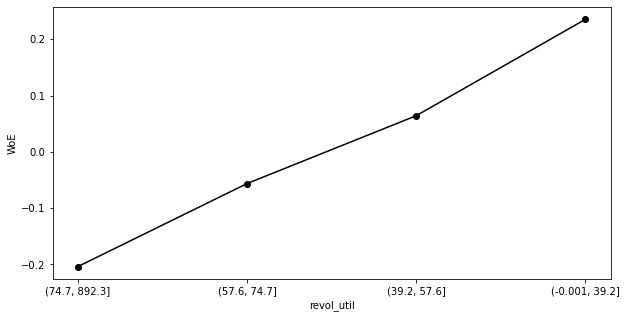

In [170]:
X_woe['revol_util'] = pd.qcut(data['revol_util'], 4)
df_temp = calculate_woe(X_woe, 'revol_util', data['loan_status'])
plot_woe(df_temp)
df_temp

### total_acc

In [171]:
print(data['total_acc'].value_counts())
print(data['total_acc'].isnull().sum())

21.0     17087
20.0     17073
22.0     17028
23.0     16719
19.0     16709
         ...  
106.0        1
156.0        1
101.0        1
96.0         1
118.0        1
Name: total_acc, Length: 112, dtype: int64
29


,total_acc,support,pos%,WoE,IV
0,"(0.999, 17.0]",132281,0.879930,-0.106074,0.005802
1,"(17.0, 23.0]",101106,0.889789,-0.009253,0.005802
2,"(23.0, 32.0]",123799,0.895605,0.051477,0.005802
3,"(32.0, 156.0]",109070,0.899010,0.088430,0.005802


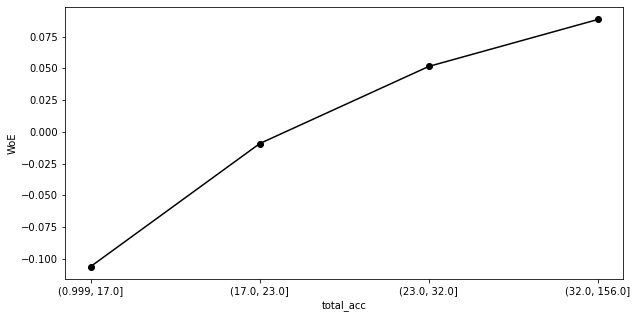

In [172]:
X_woe['total_acc'] = pd.qcut(data['total_acc'], 4)
df_temp = calculate_woe(X_woe, 'total_acc', data['loan_status'])
plot_woe(df_temp)
df_temp
# feature can be discarded as IV is Too Low 

### initial_list_status

In [173]:
print(data['initial_list_status'].value_counts())
print(data['initial_list_status'].isnull().sum())

f    303005
w    163280
Name: initial_list_status, dtype: int64
0


,initial_list_status,support,pos%,WoE,IV
0,f,303005,0.879692,-0.108330,0.024801
1,w,163280,0.911110,0.229417,0.024801


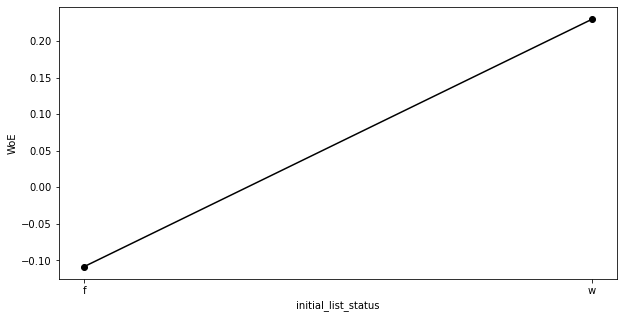

In [174]:
df_temp = calculate_woe(data, 'initial_list_status', data['loan_status'])
plot_woe(df_temp)
df_temp
# Categorical data doesn't need binning

### out_prncp

In [175]:
print(data['out_prncp'].value_counts())
print(data['out_prncp'].isnull().sum())

0.00        229999
5684.61         80
6563.61         79
5617.88         78
6110.65         76
             ...  
788.62           1
2656.39          1
602.44           1
18067.18         1
3984.38          1
Name: out_prncp, Length: 135665, dtype: int64
0


,out_prncp,support,pos%,WoE,IV
0,"(-0.001, 441.47]",233143,0.814268,-0.619856,0.747622
1,"(7341.65, 32160.38]",116568,0.962005,1.133721,0.747622
2,"(441.47, 7341.65]",116574,0.972232,1.457875,0.747622


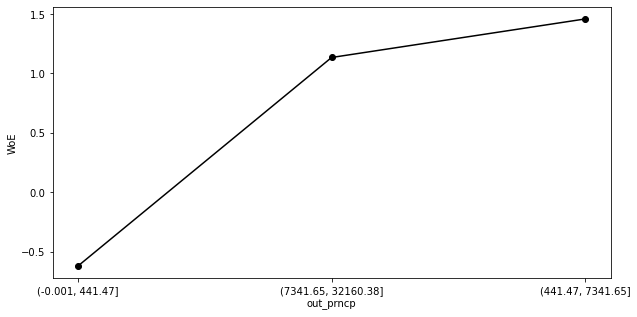

In [176]:
X_woe['out_prncp'] = pd.qcut(data['out_prncp'], 4, duplicates='drop')
df_temp = calculate_woe(X_woe, 'out_prncp', data['loan_status'])
plot_woe(df_temp)
df_temp

### out_prncp_inv

In [177]:
print(data['out_prncp_inv'].value_counts())
print(data['out_prncp_inv'].isnull().sum())

0.00        229999
6563.61         78
5684.61         77
5617.88         76
6110.65         75
             ...  
1273.13          1
16869.63         1
9541.53          1
1273.53          1
3974.41          1
Name: out_prncp_inv, Length: 141189, dtype: int64
0


,out_prncp_inv,support,pos%,WoE,IV
0,"(-0.001, 441.38]",233144,0.814269,-0.619851,0.747598
1,"(7338.39, 32160.38]",116554,0.962009,1.133831,0.747598
2,"(441.38, 7338.39]",116587,0.972227,1.457672,0.747598


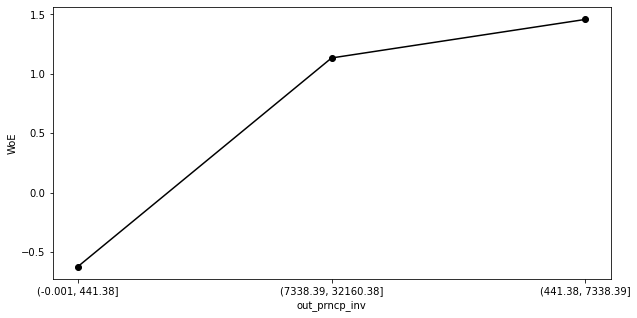

In [178]:
X_woe['out_prncp_inv'] = pd.qcut(data['out_prncp_inv'], 4, duplicates='drop')
df_temp = calculate_woe(X_woe, 'out_prncp_inv', data['loan_status'])
plot_woe(df_temp)
df_temp

### total_pymnt

In [179]:
print(data['total_pymnt'].value_counts())
print(data['total_pymnt'].isnull().sum())

6743.730000     117
0.000000         87
5564.780000      78
5497.460000      75
5419.430000      75
               ... 
6307.496889       1
4271.330000       1
10706.700000      1
21385.730000      1
8821.620000       1
Name: total_pymnt, Length: 351609, dtype: int64
0


,total_pymnt,support,pos%,WoE,IV
0,"(-0.001, 5552.125]",116572,0.776876,-0.850290,0.517973
1,"(5552.125, 9419.251]",116571,0.892623,0.019978,0.517973
2,"(9419.251, 15308.158]",116571,0.929614,0.482927,0.517973
3,"(15308.158, 57777.58]",116571,0.963662,1.180022,0.517973


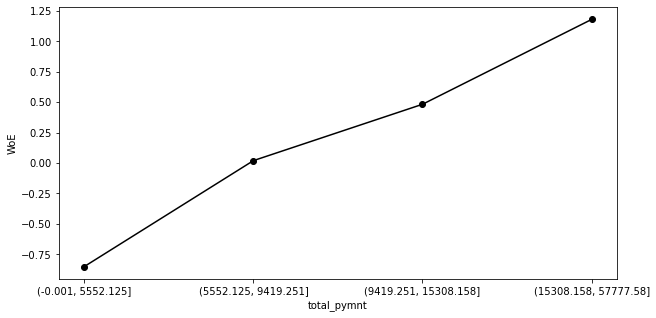

In [180]:
X_woe['total_pymnt'] = pd.qcut(data['total_pymnt'], 4, duplicates='drop')
df_temp = calculate_woe(X_woe, 'total_pymnt', data['loan_status'])
plot_woe(df_temp)
df_temp

In [181]:
print(data['total_rec_prncp'].value_counts())
print(data['total_rec_prncp'].isnull().sum())

10000.00    13267
12000.00    10469
15000.00     8552
20000.00     7673
8000.00      6522
            ...  
16731.08        1
3987.47         1
6927.01         1
11253.08        1
6015.62         1
Name: total_rec_prncp, Length: 172713, dtype: int64
0


,total_rec_prncp,support,pos%,WoE,IV
0,"(-0.001, 3708.56]",116572,0.724582,-1.130538,1.097607
1,"(3708.56, 6817.76]",116572,0.902404,0.126378,1.097607
2,"(6817.76, 12000.0]",123921,0.953809,0.929841,1.097607
3,"(12000.0, 35000.03]",109220,0.983877,2.013383,1.097607


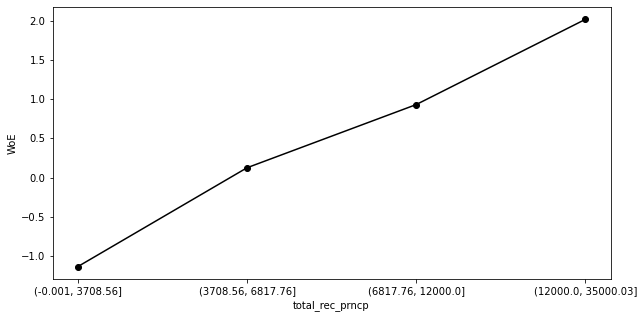

In [182]:
X_woe['total_rec_prncp'] = pd.qcut(data['total_rec_prncp'], 4)
df_temp = calculate_woe(X_woe, 'total_rec_prncp', data['loan_status'])
plot_woe(df_temp)
df_temp

In [183]:
print(data['total_rec_int'].value_counts())
print(data['total_rec_int'].isnull().sum())

0.00       379
1249.39     78
1329.13     75
1037.31     74
1350.99     72
          ... 
5322.44      1
7909.43      1
9697.29      1
3723.50      1
6072.29      1
Name: total_rec_int, Length: 270249, dtype: int64
0


,total_rec_int,support,pos%,WoE,IV
0,"(-0.001, 957.28]",116572,0.868896,-0.206607,0.016423
1,"(957.28, 1818.88]",116577,0.894370,0.038336,0.016423
2,"(3304.53, 24205.62]",116571,0.899744,0.096534,0.016423
3,"(1818.88, 3304.53]",116565,0.899764,0.096762,0.016423


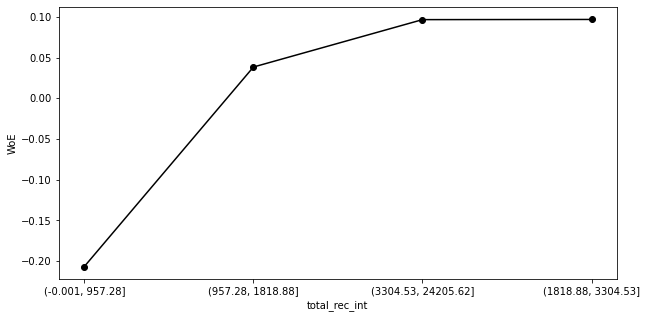

In [208]:
X_woe['total_rec_int'] = pd.qcut(data['total_rec_int'], 4)
df_temp = calculate_woe(X_woe, 'total_rec_int', data['loan_status'])
plot_woe(df_temp)
df_temp
# feature can be discarded as IV is Too Low 

In [185]:
print(data['total_rec_late_fee'].value_counts())
print(data['total_rec_late_fee'].isnull().sum())

0.000000     455607
15.000000      2223
30.000000       285
45.000000        50
16.840000        15
              ...  
15.026894         1
23.190501         1
14.959976         1
37.751380         1
41.150000         1
Name: total_rec_late_fee, Length: 5808, dtype: int64
0


,total_rec_late_fee,support,pos%,WoE,IV
0,"(239.12, 358.68]",6,0.333333,-2.790991,0.00064
1,"(119.56, 239.12]",84,0.464286,-2.240945,0.00064
2,"(-0.359, 119.56]",466195,0.890777,0.000863,0.00064


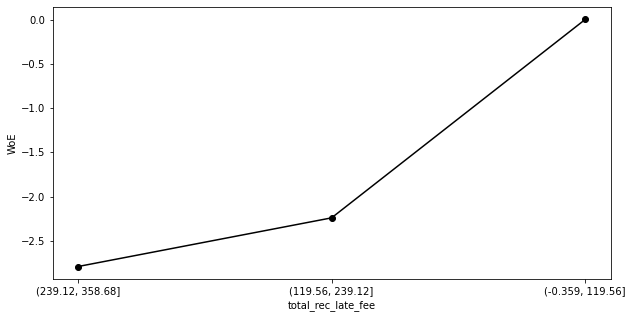

In [209]:
X_woe['total_rec_late_fee'] = pd.cut(data['total_rec_late_fee'], 3, duplicates='drop')
df_temp = calculate_woe(X_woe, 'total_rec_late_fee', data['loan_status'])
plot_woe(df_temp)
df_temp
# feature can be discarded as IV is Too Low 

In [187]:
print(data['recoveries'].value_counts())
print(data['recoveries'].isnull().sum())

0.00       441914
14.28           9
11.70           9
200.00          9
10.00           9
            ...  
423.23          1
2311.77         1
850.18          1
5052.98         1
1159.40         1
Name: recoveries, Length: 22773, dtype: int64
0


In [188]:
print(data['collection_recovery_fee'].value_counts())
print(data['collection_recovery_fee'].isnull().sum())

0.0000      443079
2.0000          18
1.8000          13
1.8800          12
1.2000          12
             ...  
330.4404         1
149.1210         1
2.9795           1
8.8326           1
11.5940          1
Name: collection_recovery_fee, Length: 20275, dtype: int64
0


In [189]:
print(data['last_pymnt_d'].value_counts())
print(data['last_pymnt_d'].isnull().sum())

Jan-16    179620
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
           ...  
Jun-08        20
Mar-08        18
Jan-08        11
Feb-08         8
Dec-07         2
Name: last_pymnt_d, Length: 98, dtype: int64
376


In [190]:
print(data['last_pymnt_amnt'].value_counts())
print(data['last_pymnt_amnt'].isnull().sum())

327.34      860
336.90      828
332.10      625
491.01      579
392.81      567
           ... 
2535.08       1
6432.03       1
6705.61       1
14086.04      1
1500.68       1
Name: last_pymnt_amnt, Length: 198194, dtype: int64
0


In [191]:
X_woe['last_pymnt_amnt'] = pd.cut(data['last_pymnt_amnt'], 3)
df_temp = calculate_woe(X_woe, 'last_pymnt_amnt', data['last_pymnt_amnt'])
plot_woe(df_temp)
df_temp

ValueError: Grouper for 'last_pymnt_amnt' not 1-dimensional

In [ ]:
print(data['next_pymnt_d'].value_counts())
print(data['next_pymnt_d'].isnull().sum())

In [192]:
print(data['last_credit_pull_d'].value_counts())
print(data['last_credit_pull_d'].isnull().sum())

In [193]:
# X_woe['last_credit_pull_d'] = pd.cut(data['last_credit_pull_d'], 3)
# df_temp = calculate_woe(X_woe, 'last_credit_pull_d', data['loan_status'])
# plot_woe(df_temp)
# df_temp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
print(data['collections_12_mths_ex_med'].value_counts())
print(data['collections_12_mths_ex_med'].isnull().sum())

,collections_12_mths_ex_med,support,pos%,WoE,IV
0,"(-0.02, 6.667]",466138,0.890719,-0.000005,2.320312e-11
1,"(13.333, 20.0]",2,1.000000,inf,2.320312e-11
2,"(6.667, 13.333]",0,NaN,NaN,2.320312e-11


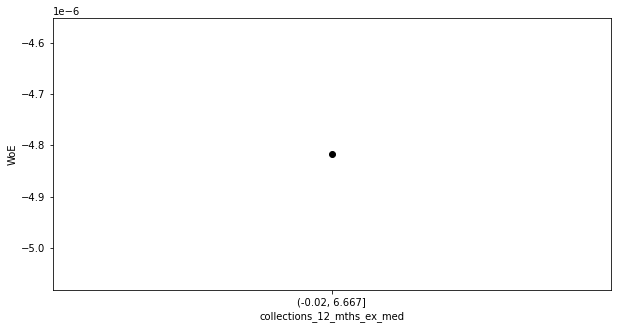

In [194]:
X_woe['collections_12_mths_ex_med'] = pd.cut(data['collections_12_mths_ex_med'], 3)
df_temp = calculate_woe(X_woe, 'collections_12_mths_ex_med', data['loan_status'])
plot_woe(df_temp)
df_temp

In [ ]:
print(data['mths_since_last_major_derog'].value_counts())
print(data['mths_since_last_major_derog'].isnull().sum())

,mths_since_last_major_derog,support,pos%,WoE,IV
0,"(62.667, 125.333]",20692,0.893292,-0.049315,0.00025
1,"(-0.188, 62.667]",78135,0.899047,0.012542,0.00025
2,"(125.333, 188.0]",147,0.938776,0.555896,0.00025


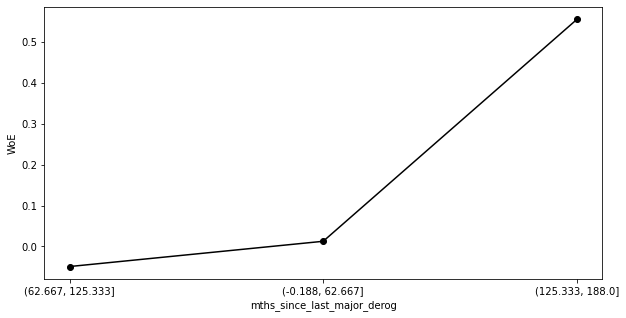

In [195]:
X_woe['mths_since_last_major_derog'] = pd.cut(data['mths_since_last_major_derog'], 3)
df_temp = calculate_woe(X_woe, 'mths_since_last_major_derog', data['loan_status'])
plot_woe(df_temp)
df_temp

In [ ]:
print(data['policy_code'].value_counts())
print(data['policy_code'].isnull().sum())

,policy_code,support,pos%,WoE,IV
0,"(0.9997, 1.0003]",466285,0.890693,0.0,0.0
1,"(0.999, 0.9997]",0,NaN,NaN,0.0
2,"(1.0003, 1.001]",0,NaN,NaN,0.0


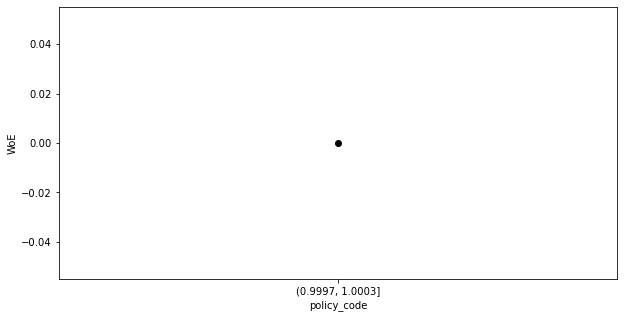

In [196]:
X_woe['policy_code'] = pd.cut(data['policy_code'], 3)
df_temp = calculate_woe(X_woe, 'policy_code', data['loan_status'])
plot_woe(df_temp)
df_temp

In [ ]:
print(data['application_type'].value_counts())
print(data['application_type'].isnull().sum())

In [197]:
print(data['acc_now_delinq'].value_counts())
print(data['acc_now_delinq'].isnull().sum())

0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64
29


,acc_now_delinq,support,pos%,WoE,IV
0,"(3.333, 5.0]",6,0.833333,-0.488402,0.000001
1,"(-0.005, 1.667]",466147,0.890693,0.000002,0.000001
2,"(1.667, 3.333]",103,0.893204,0.026053,0.000001


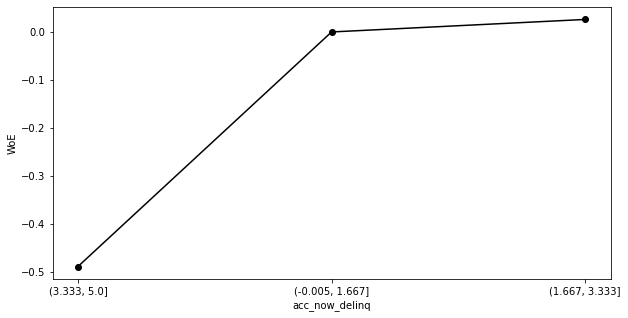

In [178]:
X_woe['acc_now_delinq'] = pd.cut(data['acc_now_delinq'], 3, duplicates = 'drop')
df_temp = calculate_woe(X_woe, 'acc_now_delinq', data['loan_status'])
plot_woe(df_temp)
df_temp